# Background and Context:

 The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.

# Objective:

* need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards.

# Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

# Import neccesary Libaries :

In [106]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor

# Load and overview the dataset :

In [2]:
data = pd.read_csv("BankChurners.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are total 21 columns and 10127 observations in the dataset
- There are 6 object columns, 10 int columns and 5 float columns . As observed , there is no missing values in the dataset.

In [6]:
df.shape

(10127, 21)

In [7]:
#Checking that there is no null value in the dataset
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**Let's check the number of unique values in each column**

In [9]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- Credit_Limit, Avg_Open_To_Buy, Total_Revolving_Bal, Total_Trans_Amt have more unique values  

- Most of the unique values are seen in continous variables .

# Coversion of Objects to categorical variables:

In [10]:
df['Education_Level'] = df.Education_Level.astype('category')
df['Marital_Status'] = df.Marital_Status.astype('category')
df['Attrition_Flag'] = df.Attrition_Flag.astype('category')
df['Income_Category'] = df.Income_Category.astype('category')
df['Card_Category'] = df.Card_Category.astype('category')
df['Gender'] = df.Gender.astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [12]:
df = df.drop(['CLIENTNUM'],axis=1) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [14]:
df[df.duplicated()].count()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Univariate Analysis:

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# Observations on Customer_Age :

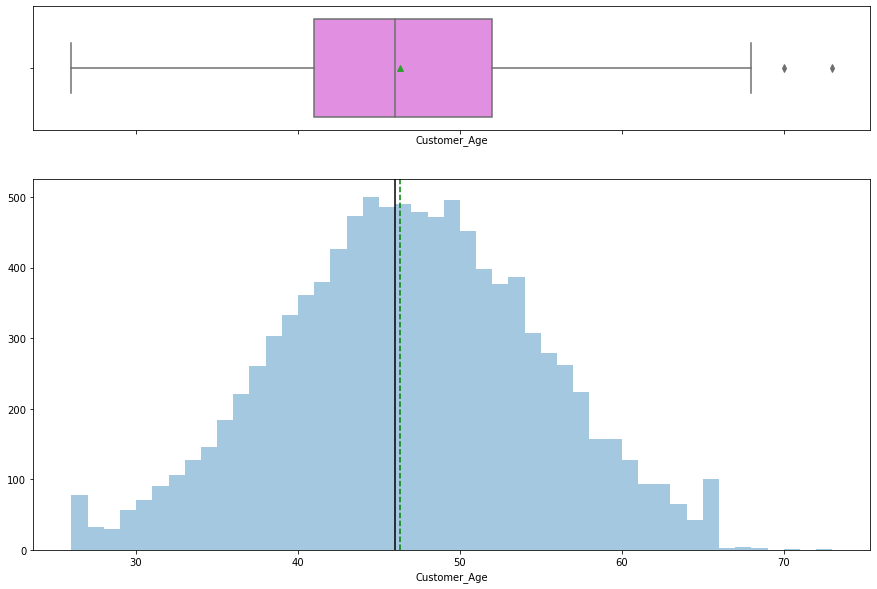

In [16]:
histogram_boxplot(df["Customer_Age"])

* The mean lies 40 to 50 years old.

# Observations on Dependent_count :

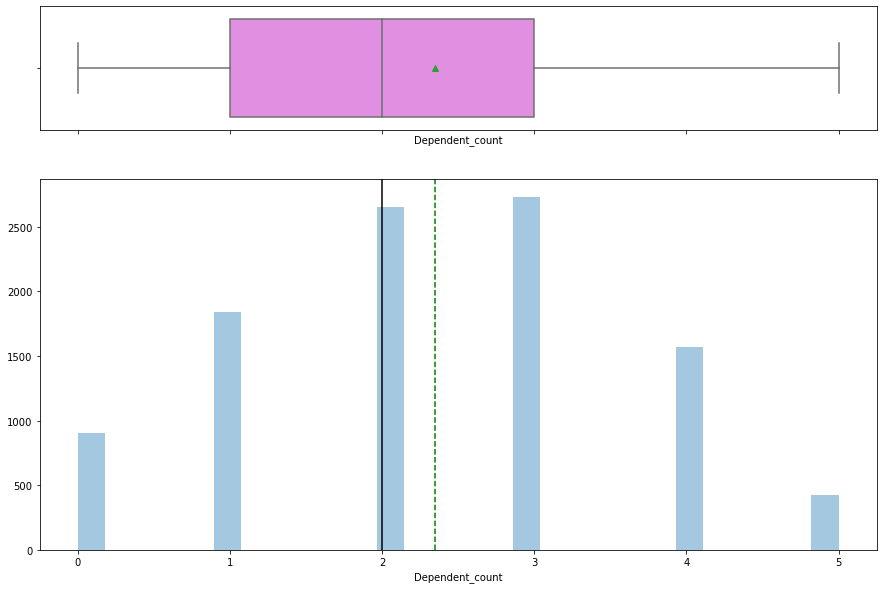

In [17]:
histogram_boxplot(df["Dependent_count"])

# Observations on Total_Relationship_Count :

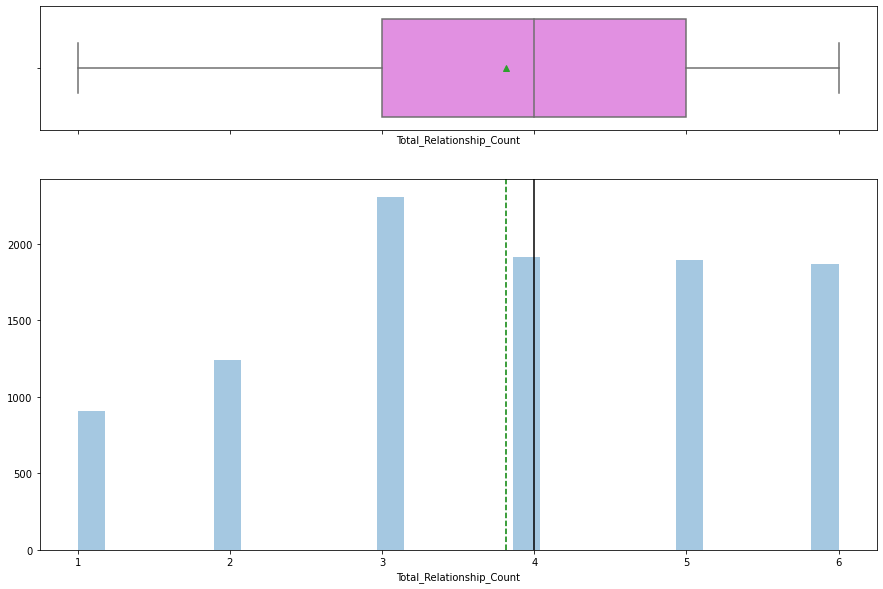

In [18]:
histogram_boxplot(df["Total_Relationship_Count"])

# Observations on Credit_Limit :

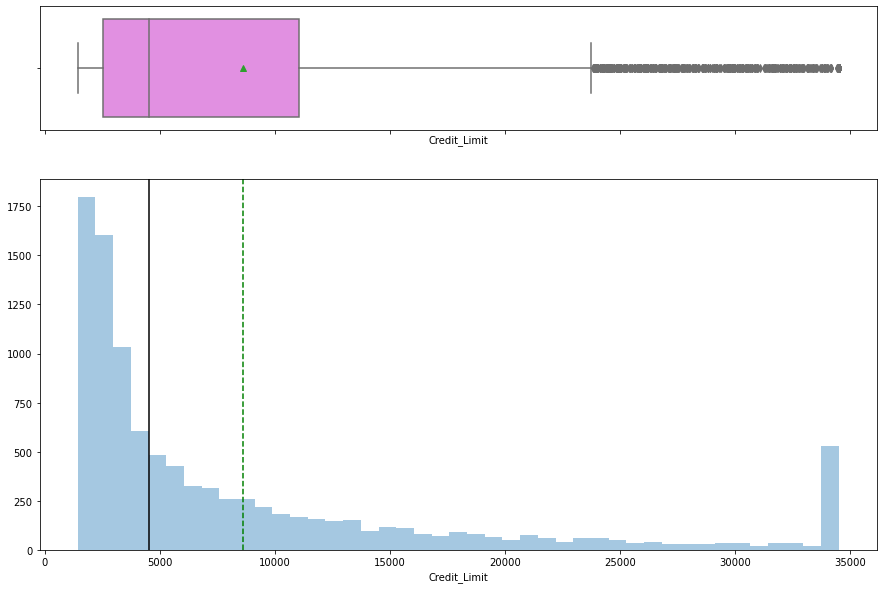

In [19]:
histogram_boxplot(df["Credit_Limit"])

# Observations on Months_Inactive_12_mon :

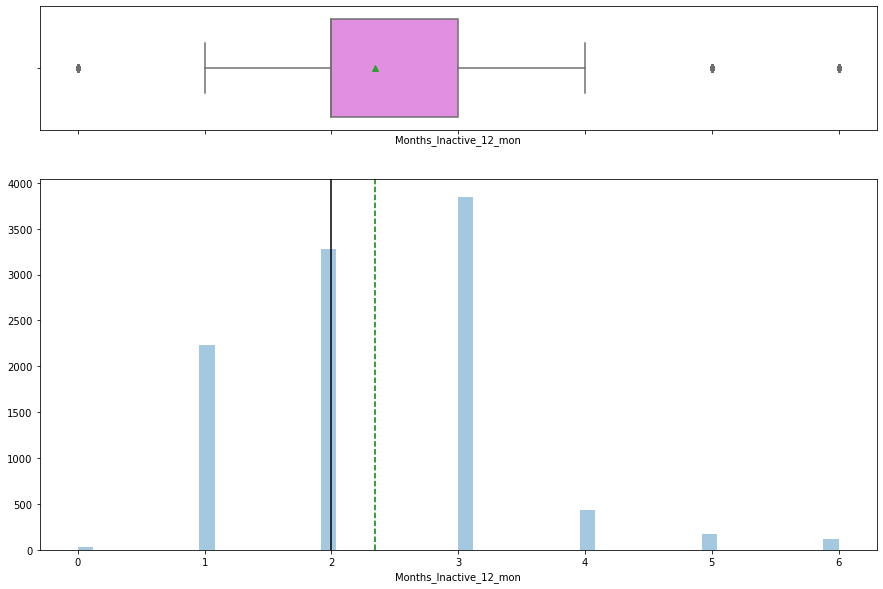

In [20]:
histogram_boxplot(df["Months_Inactive_12_mon"])

# Observations on Total_Revolving_Bal :

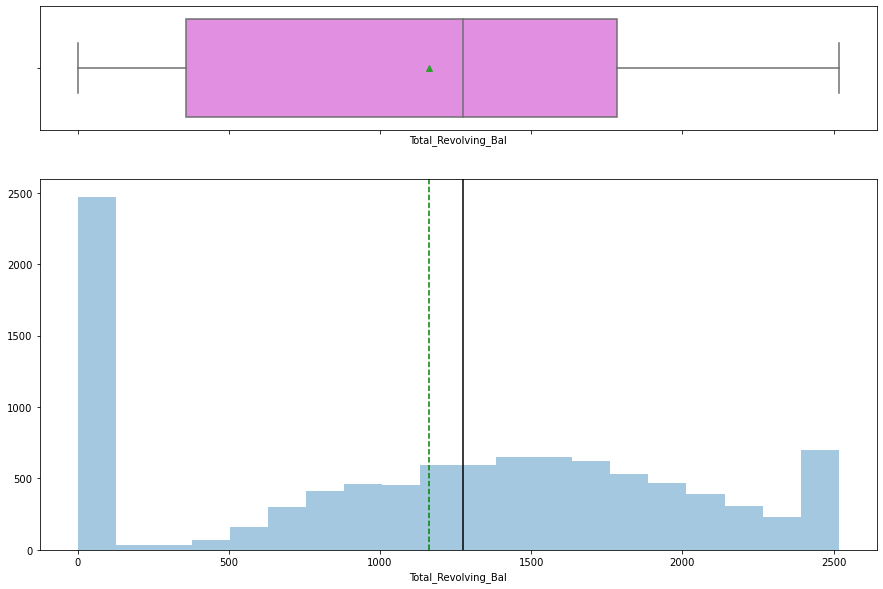

In [21]:
histogram_boxplot(df["Total_Revolving_Bal"])

# Observations on Total_Trans_Amt :

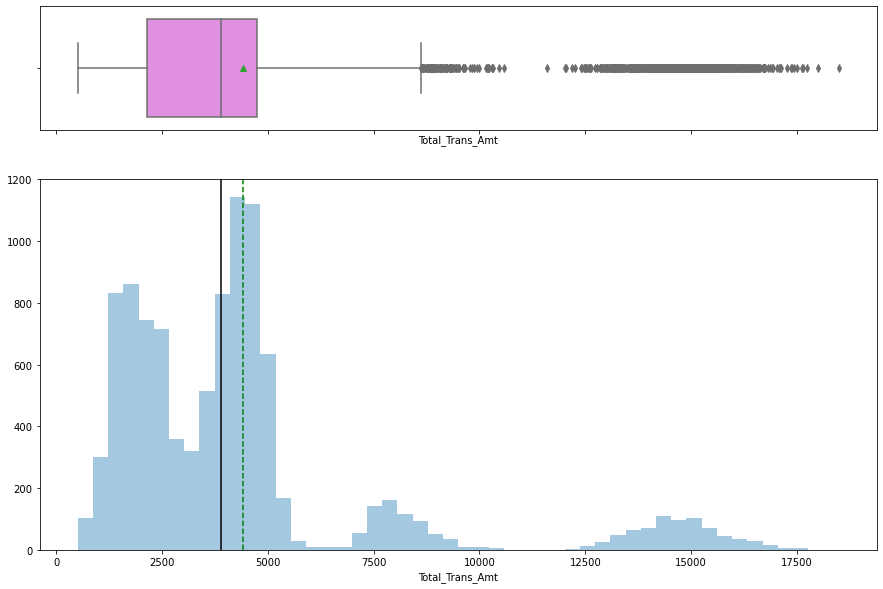

In [22]:
histogram_boxplot(df["Total_Trans_Amt"])

# Observations on Avg_Utilization_Ratio :

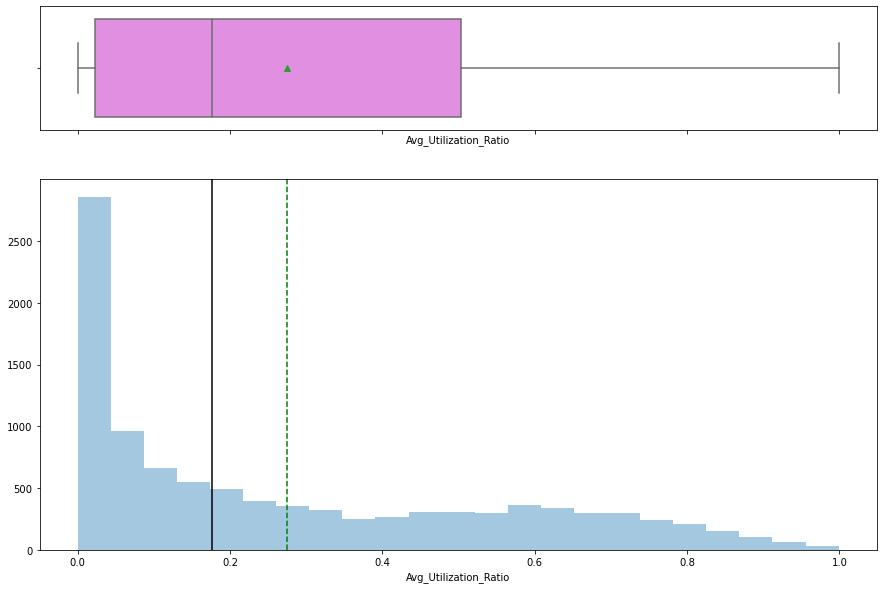

In [24]:
histogram_boxplot(df["Avg_Utilization_Ratio"])

# Observations on Contacts_Count_12_mon :

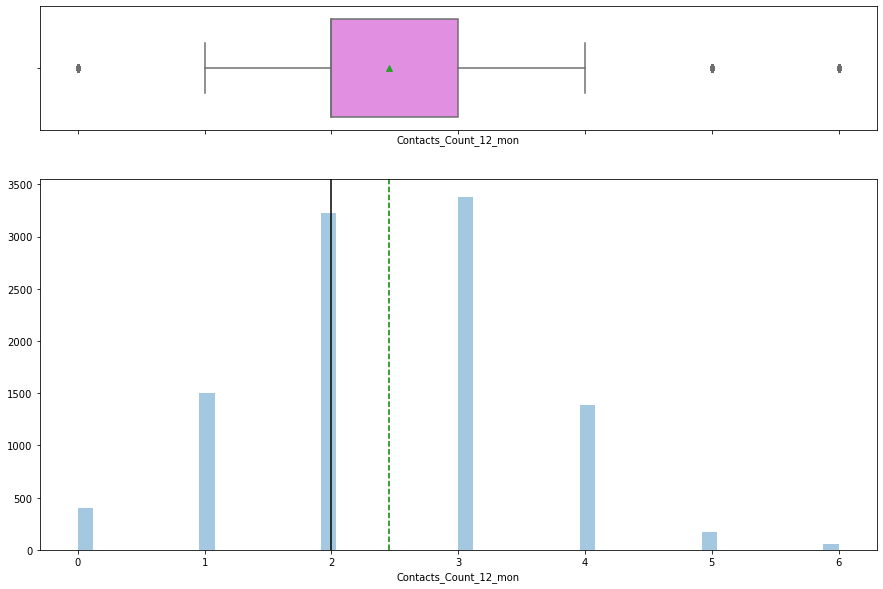

In [25]:
histogram_boxplot(df["Contacts_Count_12_mon"])

In [26]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

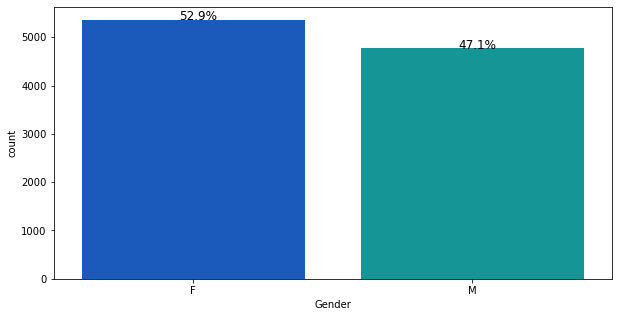

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Gender"], palette="winter")
perc_on_bar(ax, df["Gender"])

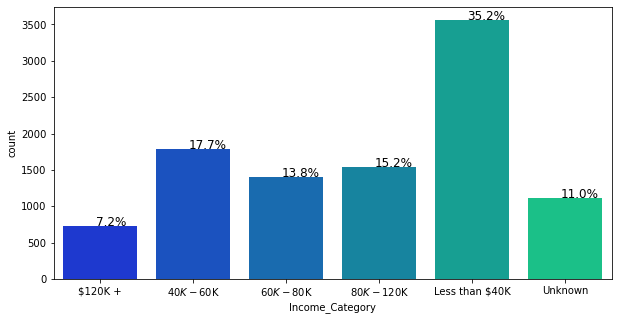

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Income_Category"], palette="winter")
perc_on_bar(ax, df["Income_Category"])

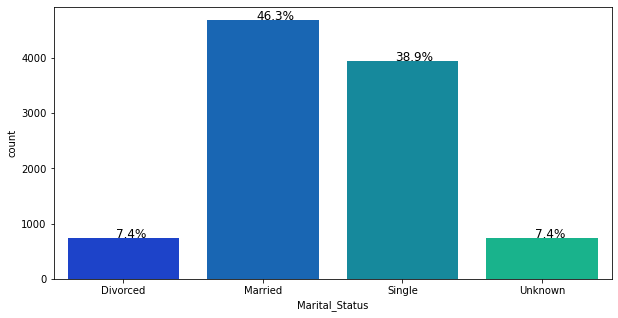

In [29]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df["Marital_Status"], palette="winter")
perc_on_bar(ax, df["Marital_Status"])

In [30]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

Customer_Age Dependent_count Months_on_book Total_Relationship_Count  \
count     10127.00        10127.00       10127.00                 10127.00   
mean         46.33            2.35          35.93                     3.81   
std           8.02            1.30           7.99                     1.55   
min          26.00            0.00          13.00                     1.00   
25%          41.00            1.00          31.00                     3.00   
50%          46.00            2.00          36.00                     4.00   
75%          52.00            3.00          40.00                     5.00   
max          73.00            5.00          56.00                     6.00   

      Months_Inactive_12_mon Contacts_Count_12_mon Credit_Limit  \
count               10127.00              10127.00     10127.00   
mean                    2.34                  2.46      8631.95   
std                     1.01                  1.11      9088.78   
min                     0.00                  0.00      1438.30   
25%                     2.00                  2.00      2555.00   
50%                     2.00                  2.00      4549.00   
75%                     3.00                  3.00     11067.50   
max                     6.00                  6.00     34516.00   

      Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1  \
count            10127.00        10127.00             10127.00   
mean              1162.81         7469.14                 0.76   
std                814.99         9090.69                 0.22   
min                  0.00            3.00                 0.00   
25%                359.00         1324.50                 0.63   
50%               1276.00         3474.00                 0.74   
75%               1784.00         9859.00                 0.86   
max               2517.00        34516.00                 3.40   

      Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio  
count        10127.00       10127.00            10127.00              10127.00  
mean          4404.09          64.86                0.71                  0.27  
std           3397.13          23.47                0.24                  0.28  
min            510.00          10.00                0.00                  0.00  
25%           2155.50          45.00                0.58                  0.02  
50%           3899.00          67.00                0.70                  0.18  
75%           4741.00          81.00                0.82                  0.50  
max          18484.00         139.00                3.71                  1.00

# Comparison Between Target variable with other variables :

# Attribution_Flag Vs Customer_Age:

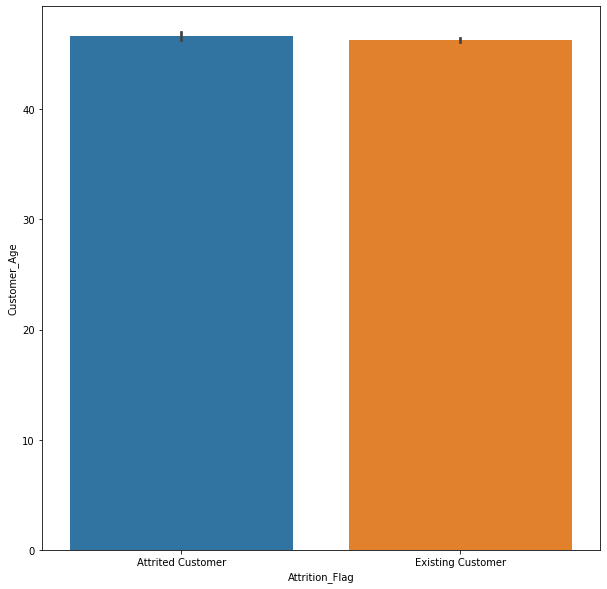

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(df['Attrition_Flag'],df['Customer_Age'])
plt.show()

# Attribution_Flag Vs Credit_Limit:

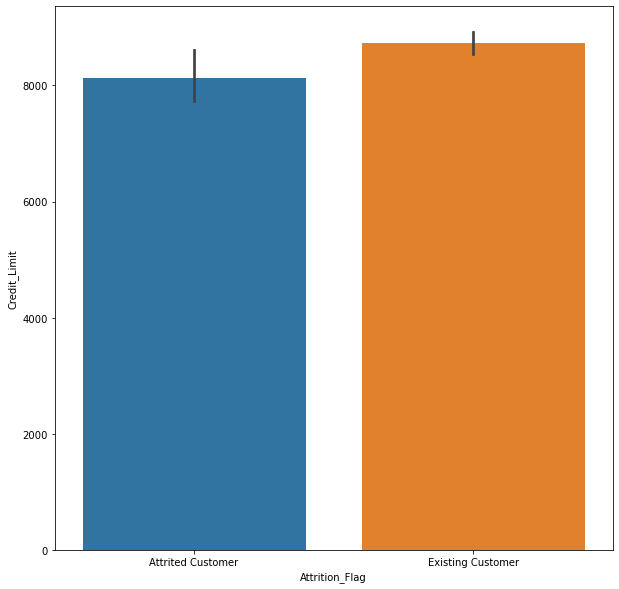

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(df['Attrition_Flag'],df['Credit_Limit'])
plt.show()

# Attribution_Flag Vs Total_Revolving_Bal:

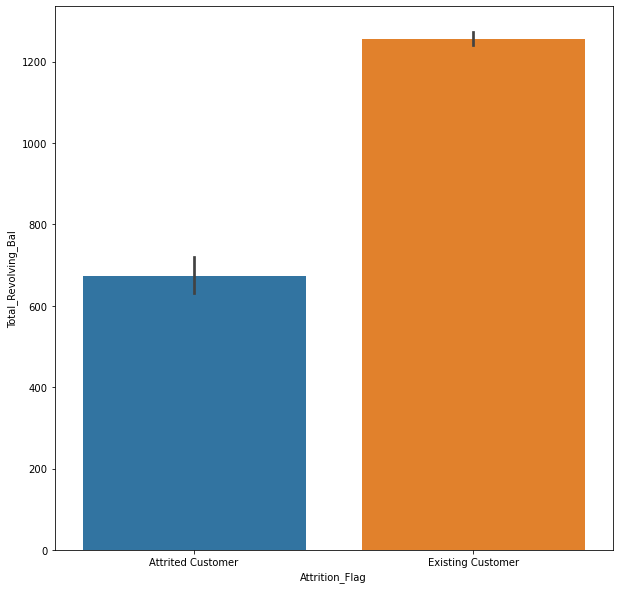

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(df['Attrition_Flag'],df['Total_Revolving_Bal'])
plt.show()

# Attribution_Flag Vs Avg_Utilization_Ratio:

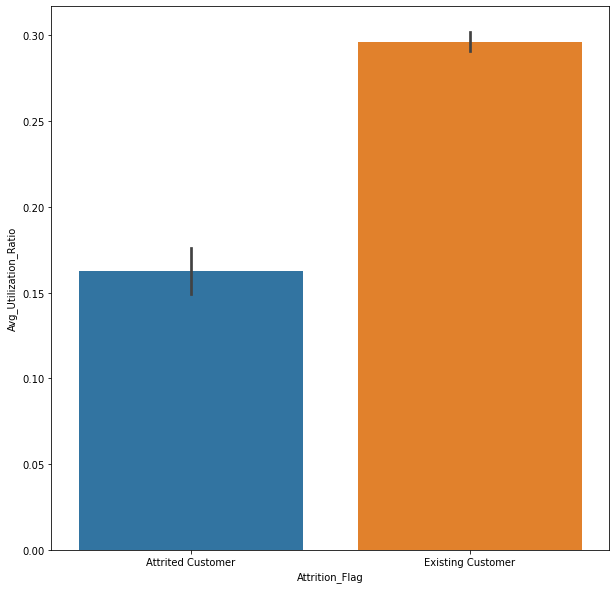

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(df['Attrition_Flag'],df['Avg_Utilization_Ratio'])
plt.show()

# Attrition_Flag Vs Marital_Status Vs Gender using ScatterPlots

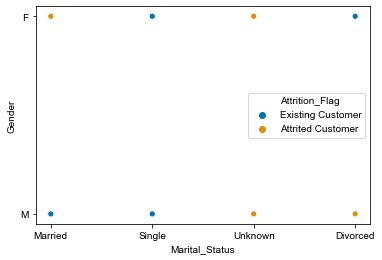

In [35]:
sns.scatterplot(x = "Marital_Status", y = "Gender", hue='Attrition_Flag' ,data = df, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Income_Category Vs Card_Category using ScatterPlots

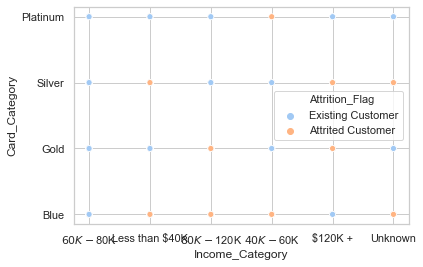

In [36]:
sns.scatterplot(x = "Income_Category", y = "Card_Category", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Income_Category Vs Education_Level using ScatterPlots

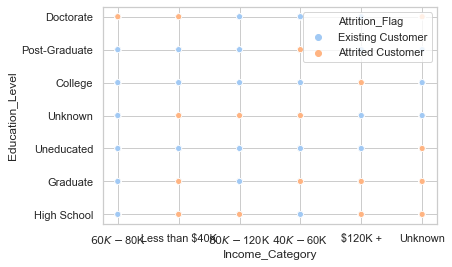

In [37]:
sns.scatterplot(x = "Income_Category", y = "Education_Level", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Gender Vs Card_Category using ScatterPlots

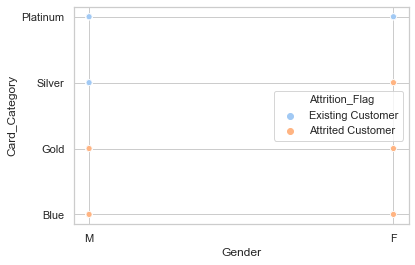

In [38]:
sns.scatterplot(x = "Gender", y = "Card_Category", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Marital_Status Vs Card_Category using ScatterPlots

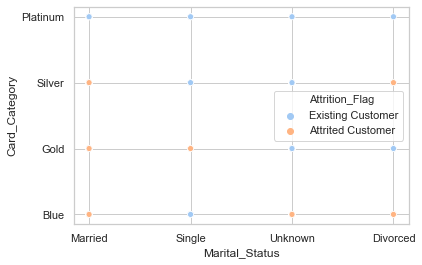

In [39]:
sns.scatterplot(x = "Marital_Status", y = "Card_Category", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Credit_Limit Vs Income_Category using ScatterPlots

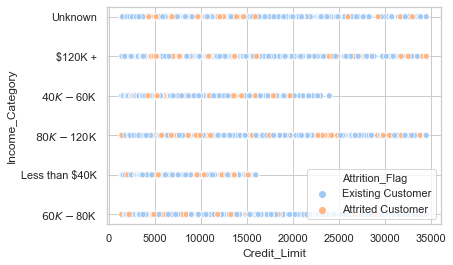

In [40]:
sns.scatterplot(x = "Credit_Limit", y = "Income_Category", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Credit_Limit Vs Card_Category using ScatterPlots

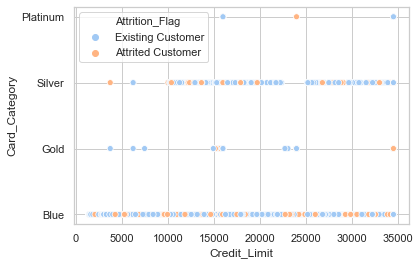

In [41]:
sns.scatterplot(x = "Credit_Limit", y = "Card_Category", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Credit_Limit Vs Total_Trans_Amt using ScatterPlots

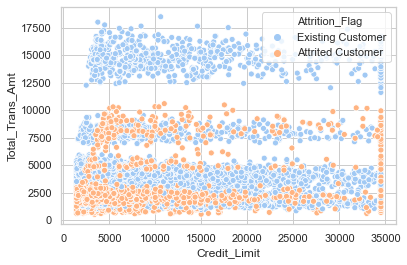

In [42]:
sns.scatterplot(x = "Credit_Limit", y = "Total_Trans_Amt", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Credit_Limit Vs Months_Inactive_12_mon using ScatterPlots

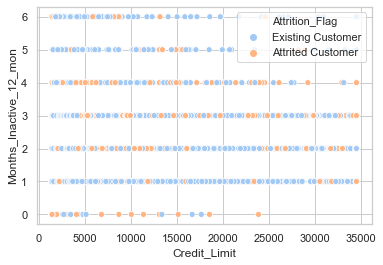

In [43]:
sns.scatterplot(x = "Credit_Limit", y = "Months_Inactive_12_mon", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Attrition_Flag Vs Credit_Limit Vs Dependent_count using ScatterPlots

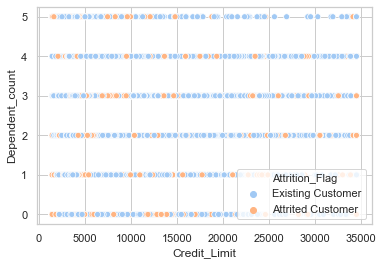

In [44]:
sns.scatterplot(x = "Credit_Limit", y = "Dependent_count", hue='Attrition_Flag' ,data = df, palette='pastel')
sns.set(style='whitegrid')
plt.show()

# Bivariate Analysis

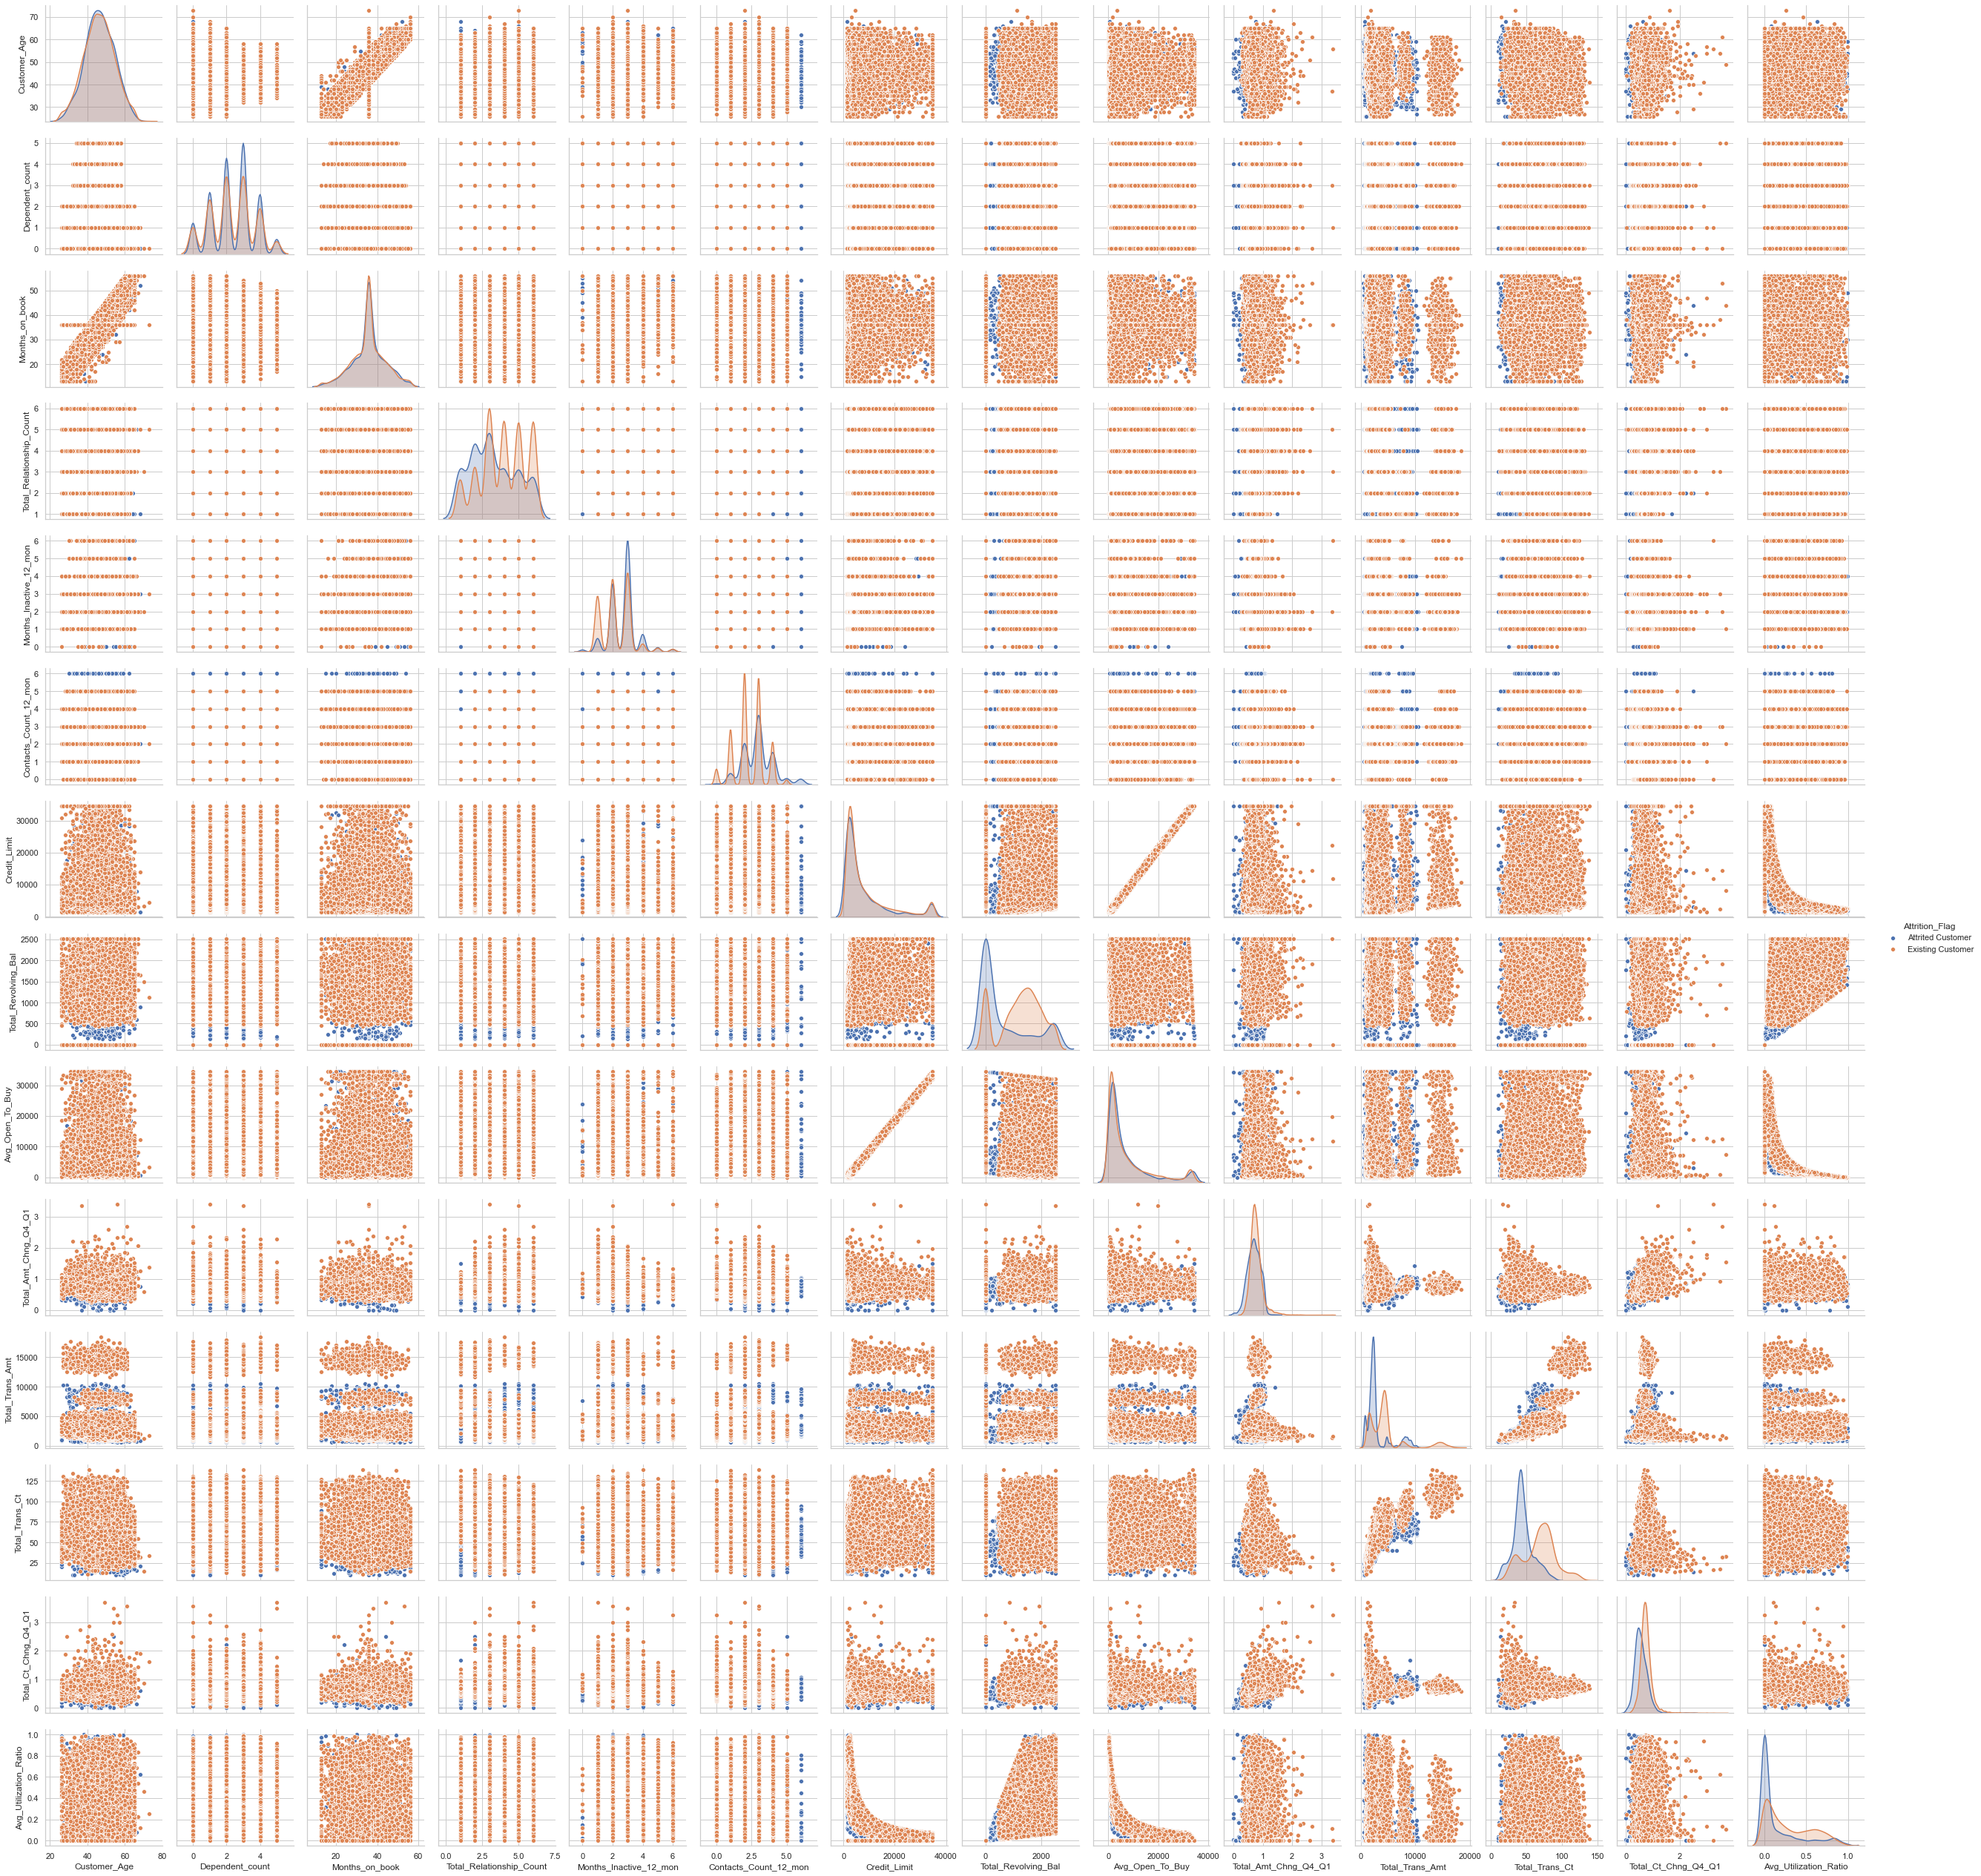

In [46]:
sns.pairplot(data=df,hue="Attrition_Flag")
plt.show()

* We will transform the Attrition flag from a categorical to a numerical data type, this will help us with the first multivariate studies. 
* For the users that were attrited we will use the 1, and for the existing custumers we will use 0. 
* Later on we want to predict which user were Attrited according to the rest of the variables. 
* Also we want to explore how is the relationship between Attrited and Existing customers

In [48]:
df['Attrition_Flag'].value_counts(normalize = True, dropna = False)
df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)

# Correlation Map:

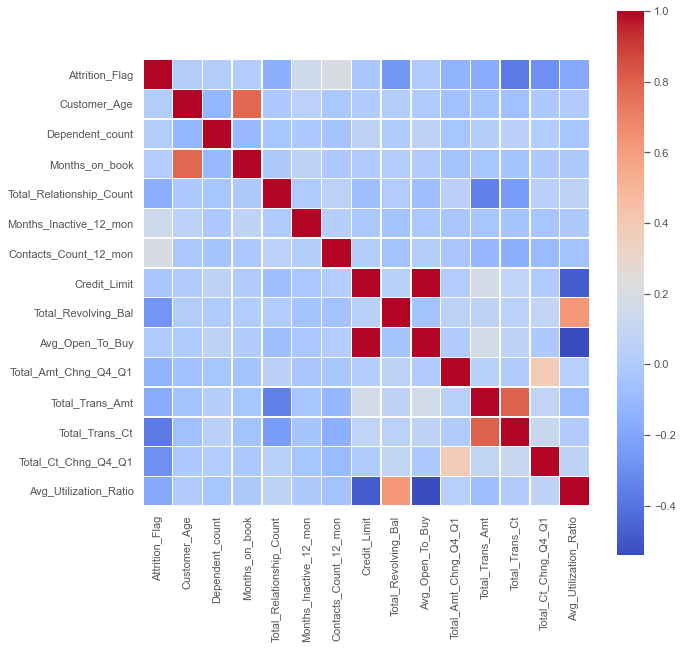

In [49]:
corr = df.corr()

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
g = sns.heatmap(corr, cmap='coolwarm', square=True, linecolor='w', linewidth=.5)
plt.show()

* Attrition flag got a correlation with the: Avg_Utilization_Ratio, Total_CT_Chang_Q4_Q1, Total_Trans_Amt, Total_Amt_Chang_Q4_Q1, Total_Revolving_Bal. 
* Let's remember that causation and correlation can exist at the same time, however correlation doesn't mean causation.
* There are some variables like Avg_Utilization_Ratio & Credit_Limit , Credit_Limit & Avg_Open_To_Buy, Months_on_book & Customer_Age, and others that are highly correlated. This could be an issue since it can indicate multicollinearity, specially if we later on want to use based models (i.e. Linear Regression, SVM) in which the results and stability of the models and for extracting the feature importance.

# Data Preprocessing:

In [59]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [60]:
#Dropping values which dont have much impact to this data model:
df = df.drop(['Contacts_Count_12_mon'] ,axis=1)

In [61]:
median = df['Total_Amt_Chng_Q4_Q1'].median()
df['Total_Amt_Chng_Q4_Q1'] = df['Total_Amt_Chng_Q4_Q1'].fillna(median)

In [62]:
df["trans_over100"]= [1 if i >= 100 else 0 for i in df['Total_Trans_Ct']] 

In [63]:
df["Total_Revolving_Bal_0"]= [1 if i == 0 else 0 for i in df['Total_Revolving_Bal']] 

In [64]:
numeric_columns = ['Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' ]

df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Credit_Limit  Total_Revolving_Bal  \
0                         5  ...       12691.0                  777   
1                         6  ...        8256.0                  864   
2                         4  ...        3418.0                    0   
3                         3  ...        3313.0                 2517   
4                         5  ...        4716.0                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0          11914.0                 1.335             1144              42   
1           7392.0                 1.541             1291              33   
2           3418.0                 2.594             1887              20   
3            796.0                 1.405             1171              20   
4           4716.0                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  trans_over100  \
0                1.625                  0.061              0   
1                3.714                  0.105              0   
2                2.333                  0.000              0   
3                2.333                  0.760              0   
4                2.500                  0.000              0   

   Total_Revolving_Bal_0  
0                      0  
1                      0  
2                      1  
3                      0  
4                      1  

[5 rows x 21 columns]

In [65]:
categorical_columns = ['Gender','trans_over100','Total_Revolving_Bal_0']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head()

Attrition_Flag  Customer_Age  Dependent_count Education_Level  \
0               0            45                3     High School   
1               0            49                5        Graduate   
2               0            51                3        Graduate   
3               0            40                4     High School   
4               0            40                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  ...  Total_Revolving_Bal  \
0                         5                       1  ...                  777   
1                         6                       1  ...                  864   
2                         4                       1  ...                    0   
3                         3                       4  ...                 2517   
4                         5                       1  ...                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0          11914.0                 1.335             1144              42   
1           7392.0                 1.541             1291              33   
2           3418.0                 2.594             1887              20   
3            796.0                 1.405             1171              20   
4           4716.0                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  trans_over100_1  \
0                1.625                  0.061         1                0   
1                3.714                  0.105         0                0   
2                2.333                  0.000         1                0   
3                2.333                  0.760         0                0   
4                2.500                  0.000         1                0   

   Total_Revolving_Bal_0_1  
0                        0  
1                        0  
2                        1  
3                        0  
4                        1  

[5 rows x 21 columns]

In [66]:
df = df.drop(['Education_Level','Marital_Status','Income_Category','Card_Category'],axis=1)

In [67]:
df.head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               0            45                3              39   
1               0            49                5              44   
2               0            51                3              36   
3               0            40                4              34   
4               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Credit_Limit  \
0                         5                       1       12691.0   
1                         6                       1        8256.0   
2                         4                       1        3418.0   
3                         3                       4        3313.0   
4                         5                       1        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Gender_M  trans_over100_1  Total_Revolving_Bal_0_1  
0                  0.061         1                0                        0  
1                  0.105         0                0                        0  
2                  0.000         1                0                        1  
3                  0.760         0                0                        0  
4                  0.000         1                0                        1

In [68]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

# Model Building:

In [69]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


In [70]:
y.value_counts(1)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

In [71]:
y_train.value_counts(1)

0    0.839306
1    0.160694
Name: Attrition_Flag, dtype: float64

In [72]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [73]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Logistic Regression

In [74]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

# Let's evaluate the model performance by using KFold and cross_val_score

* K-Folds cross-validator provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

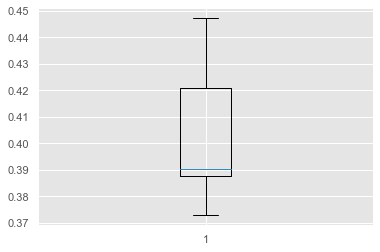

In [75]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.39 to 0.39 recall.
* Let's check the performance on test data.

Accuracy on training set :  0.871331828442438
Accuracy on test set :  0.8756169792694966
Recall on training set :  0.3810359964881475
Recall on test set :  0.4016393442622951
Precision on training set :  0.6770670826833073
Precision on test set :  0.6950354609929078


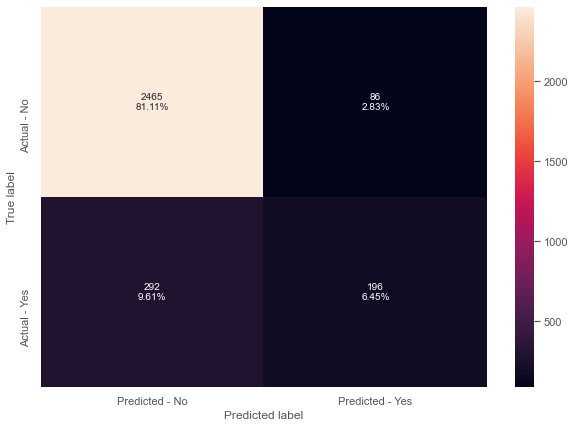

In [76]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

Logistic Regression has given a generalized performance on training and test set.
Recall is  not good enough, let's see if the model performance can be further improved by:

a) Oversampling - getting more data points for the minority class.

b) Undersampling - dealing with the class imbalance.

# Oversampling train data using SMOTE

In [83]:
from imblearn.over_sampling import SMOTE

In [82]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/sreegayathrichandramohan/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38h50d1736_0         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
              

In [84]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))


Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 16)
After UpSampling, the shape of train_y: (11898,) 



# Logistic Regression on oversampled data

In [85]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

# Let's evaluate the model performance by using KFold and cross_val_score

K-Folds cross-validator provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

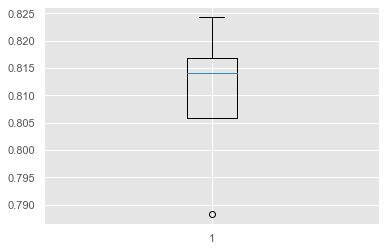

In [86]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance on training set varies between 0.814 to 0.818 recall.
* Let's check the performance on test data.

Accuracy on training set :  0.8095478231635569
Accuracy on test set :  0.7900625205659757
Recall on training set :  0.8043368633383762
Recall on test set :  0.7520491803278688
Precision on training set :  0.812807881773399
Precision on test set :  0.415158371040724


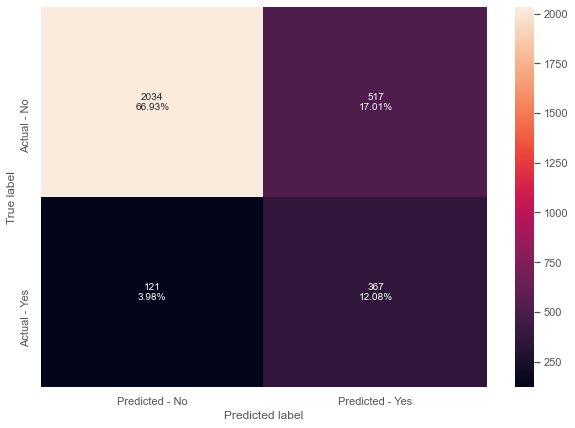

In [87]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is improved much better  and it has increased from the initial logistic model.
* Let's see if regualarization/tuning can make the model performance better.

# Regularization :

In [88]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7100353000504287
Accuracy on test set :  0.7857847976307996
Recall on training set :  0.578416540595058
Recall on test set :  0.5245901639344263
Precision on training set :  0.78507871321013
Precision on test set :  0.37925925925925924


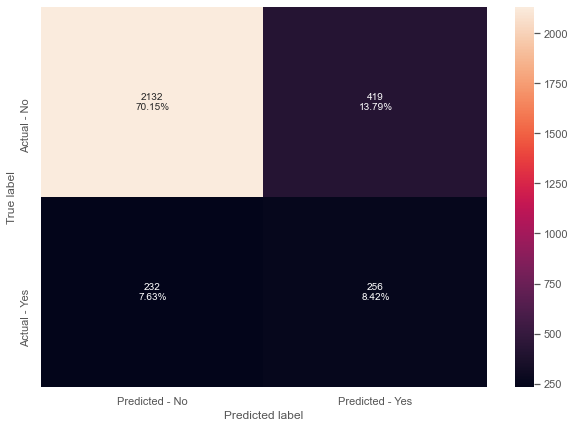

In [89]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* Model performance hasn't improved much after regularization.

# Undersampling train data using SMOTE:

In [90]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [91]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 16)
After Under Sampling, the shape of train_y: (2278,) 



# Logistic Regression on undersampled data

In [92]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

# Let's evaluate the model performance by using KFold and cross_val_score

* K-Folds cross-validator provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

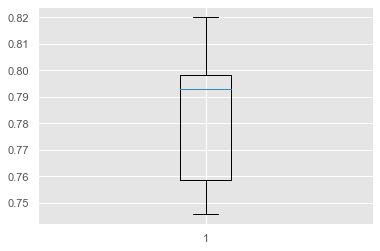

In [93]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.79 to 0.80.
* Let's check the performance on the test set.

Accuracy on training set :  0.7761194029850746
Accuracy on test set :  0.7749259624876604
Recall on training set :  0.7699736611062336
Recall on test set :  0.7479508196721312
Precision on training set :  0.7795555555555556
Precision on test set :  0.3941684665226782


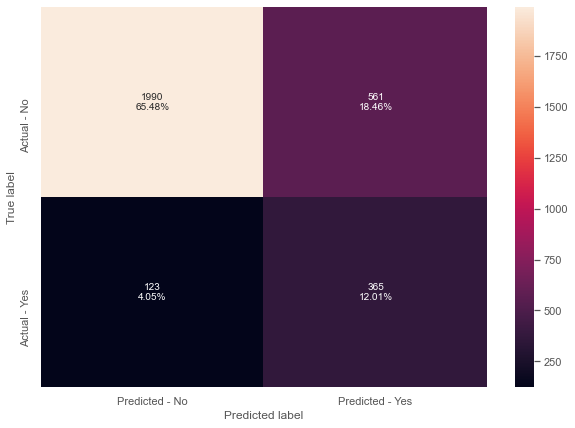

In [95]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Model has given a generalized performance on training and test set.
* Model performance has not improved much-using downsampling.

In [97]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [98]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [99]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [100]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.871332   
1            Logistic Regression on Oversampled data        0.809548   
2  Logistic Regression-Regularized (Oversampled d...        0.710035   
3           Logistic Regression on Undersampled data        0.776119   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.875617      0.381036     0.401639         0.677067        0.695035  
1       0.790063      0.804337     0.752049         0.812808        0.415158  
2       0.785785      0.578417     0.524590         0.785079        0.379259  
3       0.774926      0.769974     0.747951         0.779556        0.394168

# Finding the coefficients:

In [102]:
log_odds = lr.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef'])

coef
Customer_Age              0.112120
Dependent_count           0.166930
Months_on_book           -0.068483
Total_Relationship_Count -0.176155
Months_Inactive_12_mon    0.207908
Credit_Limit             -0.000334
Total_Revolving_Bal      -0.000660
Avg_Open_To_Buy           0.000327
Total_Amt_Chng_Q4_Q1     -0.009586
Total_Trans_Amt           0.000355
Total_Trans_Ct           -0.089610
Total_Ct_Chng_Q4_Q1      -0.043021
Avg_Utilization_Ratio     0.001154
Gender_M                 -0.026608
trans_over100_1          -0.014522
Total_Revolving_Bal_0_1   0.054571

# Converting coefficients to odds

In [103]:
odds = np.exp(lr.coef_[0])-1
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train_un.columns, columns=['odds'])

odds
Customer_Age              0.118647
Dependent_count           0.181672
Months_on_book           -0.066190
Total_Relationship_Count -0.161512
Months_Inactive_12_mon    0.231100
Credit_Limit             -0.000333
Total_Revolving_Bal      -0.000660
Avg_Open_To_Buy           0.000327
Total_Amt_Chng_Q4_Q1     -0.009540
Total_Trans_Amt           0.000355
Total_Trans_Ct           -0.085712
Total_Ct_Chng_Q4_Q1      -0.042109
Avg_Utilization_Ratio     0.001155
Gender_M                 -0.026257
trans_over100_1          -0.014417
Total_Revolving_Bal_0_1   0.056088

# Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use same codes repeatedly.

In [104]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

# <a id = "link4"></a>Decision Tree Model

In [107]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [108]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.5215280410767876
RMSE on training set :  0.0
RMSE on test set :  0.2539584604576875


* Decision tree model with default parameters is overfitting the train data.
* Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

In [112]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=10, random_state=1)

In [111]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.820904147431787
R-square on test set :  0.6550357378665247
RMSE on training set :  0.15541856759454162
RMSE on test set :  0.215636112005247


# Plotting the feature importance of each variable

In [113]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Total_Trans_Ct            0.334753
Total_Revolving_Bal       0.228432
Total_Trans_Amt           0.157837
Total_Relationship_Count  0.089146
Total_Ct_Chng_Q4_Q1       0.067057
Customer_Age              0.039135
Total_Amt_Chng_Q4_Q1      0.038267
Avg_Utilization_Ratio     0.015506
Credit_Limit              0.012958
Months_Inactive_12_mon    0.007888
Avg_Open_To_Buy           0.004520
Months_on_book            0.002515
Gender_M                  0.001986
Dependent_count           0.000000
trans_over100_1           0.000000
Total_Revolving_Bal_0_1   0.000000


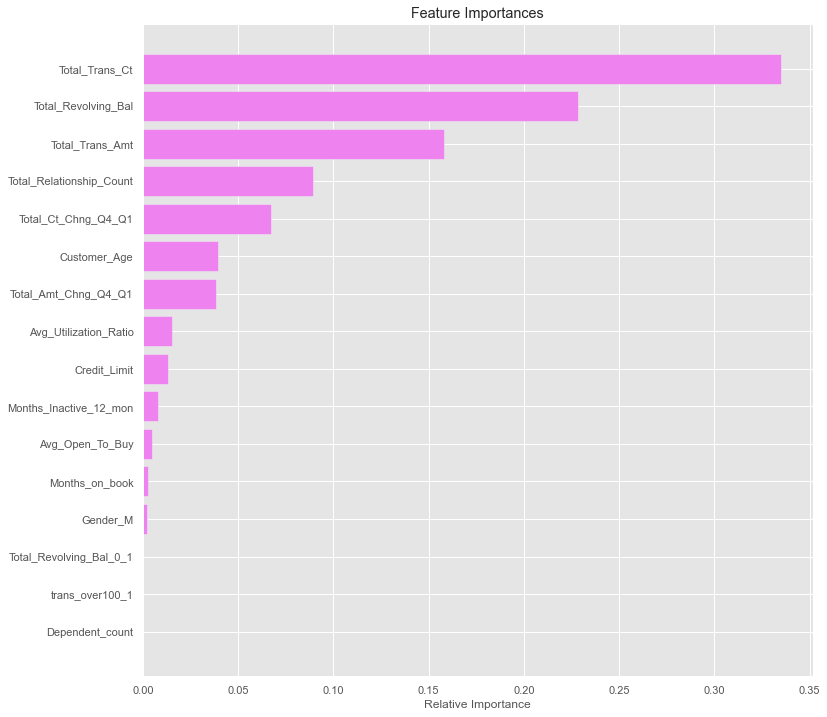

In [114]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Total_Trans_Count is the most important feature, in addition to Total_Revloving_Balance and Total_Trans_Amt, for tuned decision tree model

# <a id = "link5"></a>Random Forest Model

In [115]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [116]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9674913229527365
R-square on test set :  0.7716504781956288
RMSE on training set :  0.0662155187323427
RMSE on test set :  0.1754423732296415


- Random forest is giving good r2 score of 92% on the train data but test data is slightly overfitting the train data
- Let's try to reduce this overfitting by hyperparameter tuning.

In [117]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=90, random_state=1)

In [118]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9672976251850758
R-square on test set :  0.7720814676292759
RMSE on training set :  0.06641249306218756
RMSE on test set :  0.17527672908733147


In [119]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Total_Trans_Ct            0.299362
Total_Revolving_Bal       0.195775
Total_Trans_Amt           0.148121
Total_Relationship_Count  0.090513
Total_Ct_Chng_Q4_Q1       0.079113
Total_Amt_Chng_Q4_Q1      0.053965
Customer_Age              0.039033
Avg_Open_To_Buy           0.021594
Credit_Limit              0.018151
Months_Inactive_12_mon    0.015583
Months_on_book            0.014402
Avg_Utilization_Ratio     0.011207
Dependent_count           0.008477
Gender_M                  0.003906
Total_Revolving_Bal_0_1   0.000650
trans_over100_1           0.000150


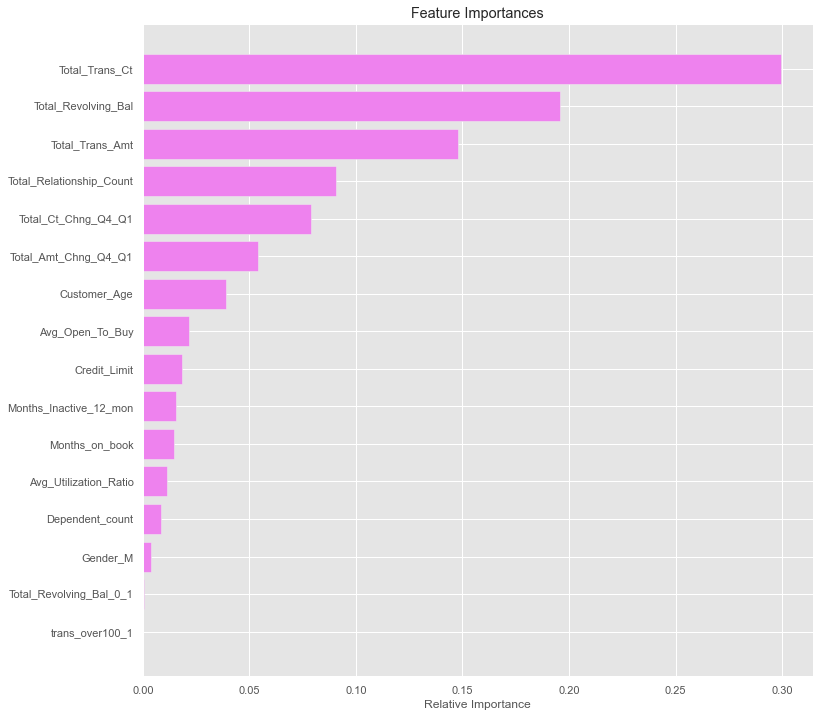

In [120]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Total_Trans_Count is the most important feature, in addition to Total_Revloving_Balance and Total_Trans_Amt, for tuned random forest model

# <a id = "link6"></a>Boosting Models

### AdaBoost Regressor

In [121]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [122]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.555460222514631
R-square on test set :  0.5211158952298964
RMSE on training set :  0.24485865044093946
RMSE on test set :  0.2540678141959945


### Hyperparameter Tuning

In [123]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=20, random_state=1)

In [124]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.5763030802384632
R-square on test set :  0.5420124807361295
RMSE on training set :  0.23904947321232642
RMSE on test set :  0.24846273516208953


In [125]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Total_Trans_Ct            0.523788
Total_Revolving_Bal       0.177629
Total_Trans_Amt           0.146261
Total_Relationship_Count  0.092979
Total_Ct_Chng_Q4_Q1       0.053649
Total_Amt_Chng_Q4_Q1      0.005693
Customer_Age              0.000000
Dependent_count           0.000000
Months_on_book            0.000000
Months_Inactive_12_mon    0.000000
Credit_Limit              0.000000
Avg_Open_To_Buy           0.000000
Avg_Utilization_Ratio     0.000000
Gender_M                  0.000000
trans_over100_1           0.000000
Total_Revolving_Bal_0_1   0.000000


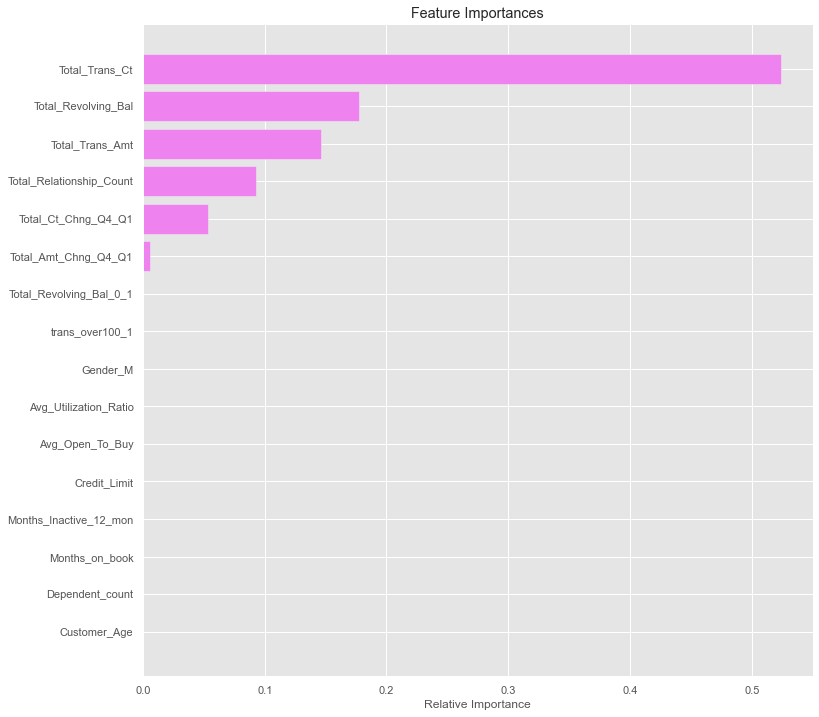

In [126]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Total_Trans_Count is the most important feature, in addition to Total_Revloving_Balance and Total_Trans_Amt, for  AdaBoost Regressor model similar to the random forest and decision tree models 

# Gradient Boosting Regressor

In [127]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [128]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.7843059970840254
R-square on test set :  0.7410991448107241
RMSE on training set :  0.1705607797345615
RMSE on test set :  0.1868104569336207


In [129]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, max_features=0.7, n_estimators=125,
                          random_state=1, subsample=0.7)

In [130]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.980447373166539
R-square on test set :  0.8033184214570533
RMSE on training set :  0.051352630332120994
RMSE on test set :  0.16282319889969352


In [131]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Total_Trans_Amt           0.222950
Total_Trans_Ct            0.216563
Total_Revolving_Bal       0.145416
Total_Ct_Chng_Q4_Q1       0.098880
Total_Relationship_Count  0.078883
Total_Amt_Chng_Q4_Q1      0.069421
Customer_Age              0.037359
Avg_Utilization_Ratio     0.032637
Avg_Open_To_Buy           0.024990
Credit_Limit              0.024914
Months_on_book            0.014842
Months_Inactive_12_mon    0.014542
Dependent_count           0.007461
Gender_M                  0.004839
Total_Revolving_Bal_0_1   0.004732
trans_over100_1           0.001570


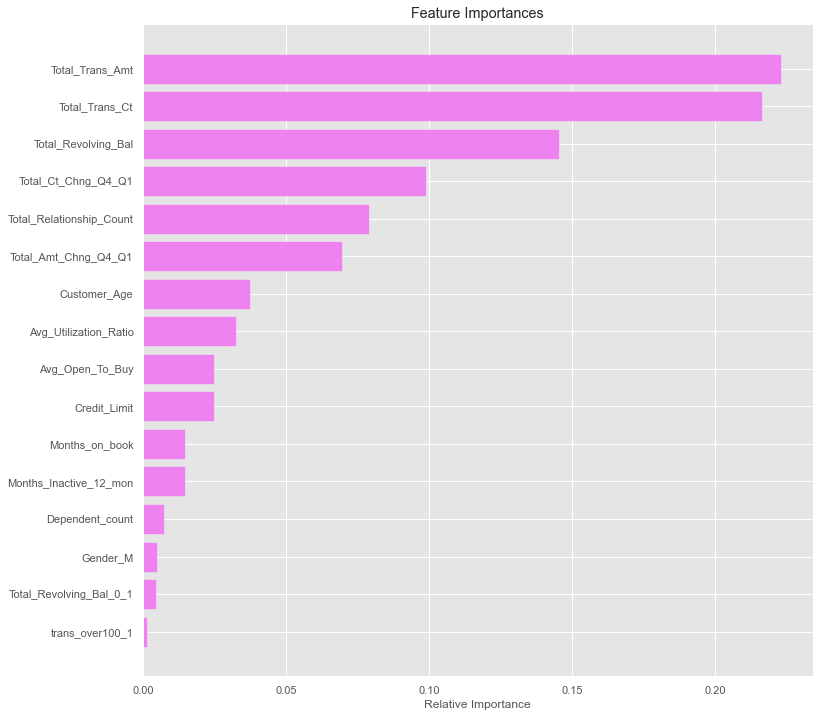

In [132]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XGBoost Regressor

In [133]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.982417544099606
R-square on test set :  0.7727645801169991
RMSE on training set :  0.048696741979487805
RMSE on test set :  0.17501386416860418


In [135]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=75, n_jobs=12, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-sqaure on training set :  0.9700461430862968
R-square on test set :  0.7680598942914229
RMSE on training set :  0.06356038410699712
RMSE on test set :  0.17681632735191086


# <a id = "link7"></a>Stacking Model

In [137]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [138]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=12,
                                                     min_samples_leaf=10,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features=None,
                                                     n_estimators=90,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=7,
                                                         max_features=0.7,
                                                         n_estimators=125,
                                                         random_state=1,
                                                         subsample=0.7))],
                  final_estimato...

In [139]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-sqaure on training set :  0.9827148862061036
R-square on test set :  0.7561030701396568
RMSE on training set :  0.048283223747065174
RMSE on test set :  0.1813166168217903


# Hyperparameter Tuning
**We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

**Fist let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [140]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [141]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree

# GridSearchCV

In [142]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 4} 
Score: 0.7954555993507999


In [143]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=4),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=4, random_state=1))])

Accuracy on training set :  0.9953442437923251
Accuracy on test set :  0.933201711089174
Recall on training set :  0.9824407374890255
Recall on test set :  0.8094262295081968
Precision on training set :  0.9885159010600707
Precision on test set :  0.7821782178217822


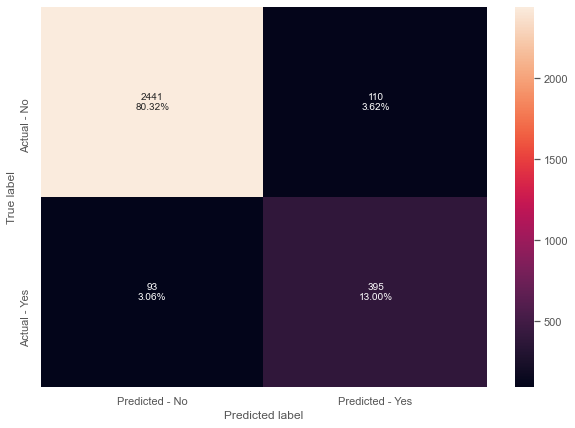

In [144]:
# Calculating different metrics
get_metrics_score(dtree_tuned1)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

# RandomizedSearchCV

In [145]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    
     "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_split': 4, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'entropy'} with CV score=0.7954555993507999:


In [146]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=7),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_split=7, random_state=1))])

Accuracy on training set :  0.9895598194130926
Accuracy on test set :  0.9397828232971372
Recall on training set :  0.9569798068481123
Recall on test set :  0.8135245901639344
Precision on training set :  0.9775784753363229
Precision on test set :  0.8118609406952966


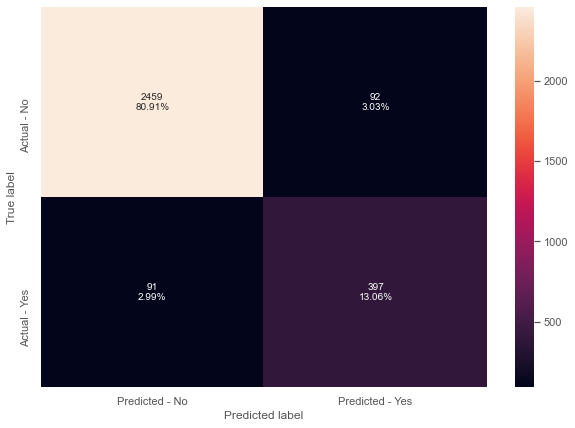

In [147]:
# Calculating different metrics
get_metrics_score(dtree_tuned2)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

# XGBoost

# GridSearchCV

In [148]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9499536285648041:


In [149]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

[19:17:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.920852144469526
Accuracy on test set :  0.8986508719973676
Recall on training set :  0.9859525899912204
Recall on test set :  0.9364754098360656
Precision on training set :  0.6732613908872902
Precision on test set :  0.6226158038147139


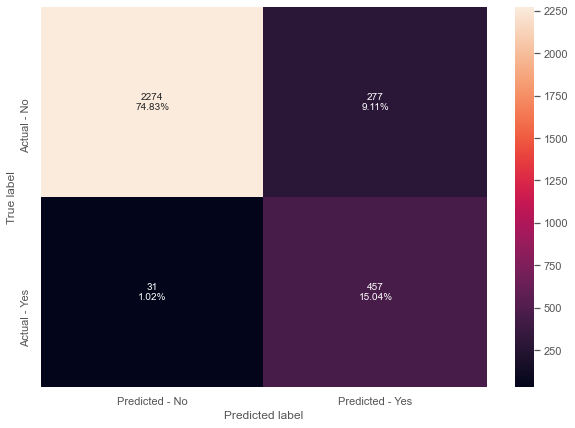

In [150]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

# RandomizedSearchCV

In [151]:
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

[19:17:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [152]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=20,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=1,
                subsample=0.9,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

[19:18:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=12, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9119638826185101
Accuracy on test set :  0.8894373149062191
Recall on training set :  0.9850746268656716
Recall on test set :  0.9282786885245902
Precision on training set :  0.64893001735107
Precision on test set :  0.6007957559681698


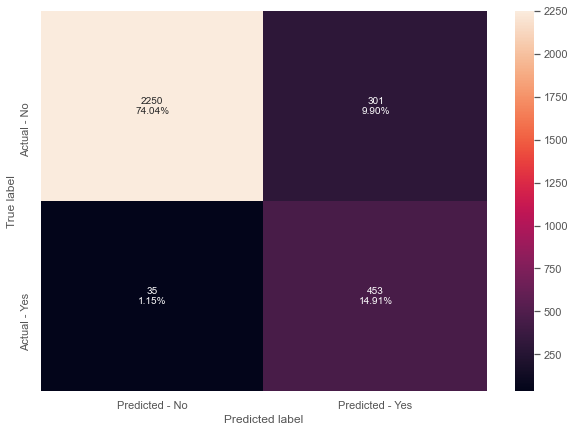

In [153]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

# Comparing models from GridsearchCV and RandomisedsearchCV

In [160]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, dtree_tuned1, dtree_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [159]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost tuned with GridSearchCV",
            "XGBoost tuned with RandomizedSearchCV",
            "Decision tree tuned with GridSearchCV",
            "Decision tree tuned with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
0              XGBoost tuned with GridSearchCV        0.920852       0.898651   
1        XGBoost tuned with RandomizedSearchCV        0.911964       0.889437   
3  Decision tree tuned with RandomizedSearchCV        0.989560       0.939783   
2        Decision tree tuned with GridSearchCV        0.995344       0.933202   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0      0.985953     0.936475         0.673261        0.622616  
1      0.985075     0.928279         0.648930        0.600796  
3      0.956980     0.813525         0.977578        0.811861  
2      0.982441     0.809426         0.988516        0.782178

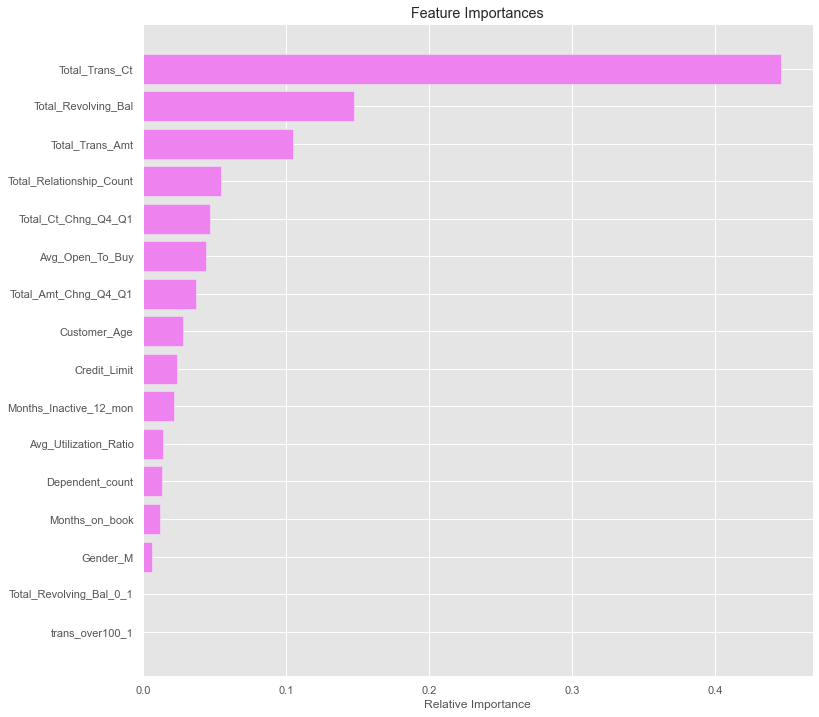

In [161]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Count is the most important feature, in addition to Total_Revloving_Balance and Total_Trans_Amt, for  Random Search and Grid Search similar to the random forest and decision tree models 

# Business And Recommendations:

* The Total_Trans_Count followed by the Total_Revloving_Balance and Total_Trans_Amt are the most important features ith the basis of comparison of Decsion tree, Boosting and Random Tree models and also the Random Search and Grid Search Models.
* Customers who are educated and has a higher income goes will use credit cards. more and renounced.
* Banks can target customers witgh high income and also csustomer with dependents can be targeted.
* Platinum card customers can be targeted for credit cards as more existing customers are having platinum cards.

